Stress Detection Using Lifestyle Data

This project predicts stress levels (Low, Medium, High) based on sleep duration, work hours, exercise frequency, and screen time. Various classification models are compared and key insights are visualized.

In [53]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

Data Cleaning

In [54]:
# Load and Preview Data
df = pd.read_csv('stress_dataset.csv')
df.head()

,Sleep_Hours,Work_Hours,Exercise_Freq,Screen_Time,Stress_Level
0,9.0,11.0,NaN,1.0,Low
1,6.0,10.0,3.0,8.0,Medium
2,7.0,NaN,NaN,4.0,Low
3,9.0,0.0,6.0,6.0,Low
4,5.0,8.0,1.0,8.0,Medium


In [55]:
# Check for missing values
df.isnull().sum()

Sleep_Hours      5
Work_Hours       4
Exercise_Freq    5
Screen_Time      5
Stress_Level     0
dtype: int64

In [56]:
# Fill missing values in numeric columns with column mean
for col in ['Sleep_Hours', 'Work_Hours', 'Exercise_Freq', 'Screen_Time']:
    df[col] = df[col].fillna(df[col].mean())

In [57]:
# Drop rows where Stress_Level is missing (if any)
df = df.dropna(subset=['Stress_Level'])

In [58]:
# Remove duplicate rows if present
df = df.drop_duplicates()

In [59]:
# Ensure all features are numeric and Stress_Level is categorical
df[['Sleep_Hours', 'Work_Hours', 'Exercise_Freq', 'Screen_Time']] = df[['Sleep_Hours', 'Work_Hours', 'Exercise_Freq', 'Screen_Time']].apply(pd.to_numeric)
df['Stress_Level'] = df['Stress_Level'].astype('category')

In [60]:
# Encode Stress_Level to numeric labels
if 'Stress_Level_Code' not in df.columns:
    df['Stress_Level_Code'] = df['Stress_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df.head()

,Sleep_Hours,Work_Hours,Exercise_Freq,Screen_Time,Stress_Level,Stress_Level_Code
0,9.0,11.000000,2.652632,1.0,Low,0
1,6.0,10.000000,3.000000,8.0,Medium,1
2,7.0,8.645833,2.652632,4.0,Low,0
3,9.0,0.000000,6.000000,6.0,Low,0
4,5.0,8.000000,1.000000,8.0,Medium,1


Model Building and Evaluation

Train and evaluate Random Forest, Logistic Regression, and SVM models.

In [61]:
# Feature Selection and Data Split
X = df[['Sleep_Hours', 'Work_Hours', 'Exercise_Freq', 'Screen_Time']]
y = df['Stress_Level_Code']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00         2

    accuracy                           0.95        20
   macro avg       0.92      0.98      0.94        20
weighted avg       0.96      0.95      0.95        20

Confusion Matrix:
 [[ 3  0  0]
 [ 1 14  0]
 [ 0  0  2]]


In [63]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Classification Report:\n', classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       0.92      0.73      0.81        15
           2       1.00      0.50      0.67         2

    accuracy                           0.75        20
   macro avg       0.78      0.74      0.69        20
weighted avg       0.85      0.75      0.77        20



In [64]:
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Classification Report:\n', classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.93      0.93      0.93        15
           2       1.00      0.50      0.67         2

    accuracy                           0.90        20
   macro avg       0.89      0.81      0.82        20
weighted avg       0.91      0.90      0.90        20



Model Comparison

In [65]:
results = []

# Random Forest
results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred, average='weighted')
})

# Logistic Regression
results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr, average='weighted'),
    'Recall': recall_score(y_test, y_pred_lr, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_lr, average='weighted')
})

# SVM
results.append({
    'Model': 'SVM',
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm, average='weighted'),
    'Recall': recall_score(y_test, y_pred_svm, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_svm, average='weighted')
})

results_df = pd.DataFrame(results)

results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.95,0.962500,0.95,0.952709
1,Logistic Regression,0.75,0.851786,0.75,0.767778
2,SVM,0.90,0.912500,0.90,0.895238


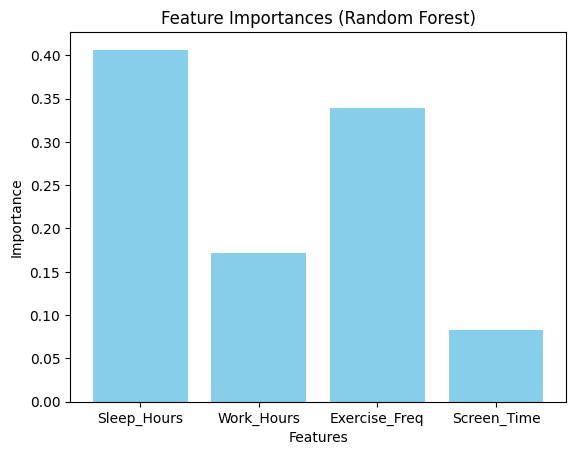

In [66]:
# Feature Importances
# Visualize which features are most important for stress prediction using Random Forest.

feature_importances = rf.feature_importances_
features = X.columns
plt.bar(features, feature_importances, color='skyblue')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

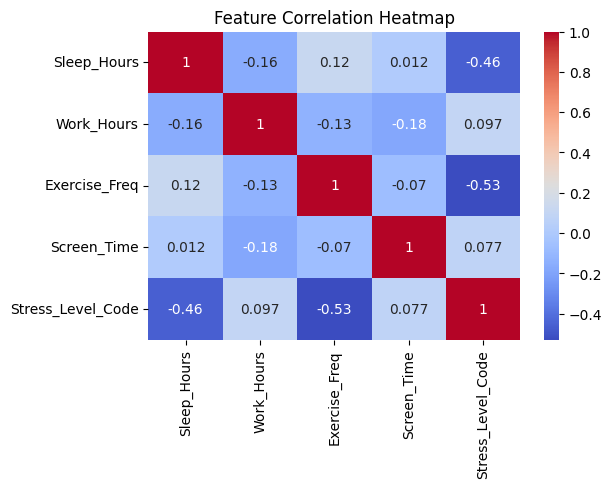

In [67]:
# Feature Correlation Heatmap
# Visualize correlations between features and the target variable.

plt.figure(figsize=(6,4))
sns.heatmap(df[['Sleep_Hours', 'Work_Hours', 'Exercise_Freq', 'Screen_Time', 'Stress_Level_Code']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [68]:
# Sample test case: Predict stress level for a new person
sample = pd.DataFrame({
    'Sleep_Hours': [6],
    'Work_Hours': [10],
    'Exercise_Freq': [2],
    'Screen_Time': [7]
})

# Predict using Random Forest
predicted_code = rf.predict(sample)[0]
stress_map = {0: 'Low', 1: 'Medium', 2: 'High'}
print("Predicted Stress Level:", stress_map[predicted_code])

Predicted Stress Level: Medium
